# ATMS 391: Homework 10
---
## Problem 1

Perform a random sampling exercise on the Chicago August temperature dataset to determine the 90% confidence interval of the mean temperature for the month when randomly subsetting the data for 10, 50, 100, and 500 samples.

Plot your results using an errorbar plot: [http://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html]



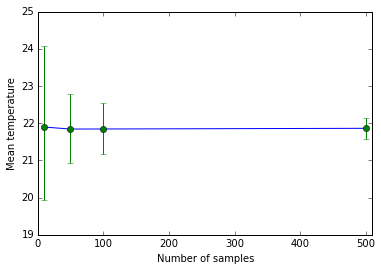

In [135]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import random
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

df = pd.read_csv('chicago_hourly_aug_2015.csv', header=6)
temp = df['DryBulbCelsius'].values

def make_sample(n=100):
    sample = np.random.choice(temp,n)
    return sample
def sample_stat(sample):
    return sample.mean()
def compute_sample_statistics(n=100, iters=1000):
    stats = [sample_stat(make_sample(n)) for i in range(iters)]
    #print sample_stat(make_sample(n))
    return np.array(stats)

sample_10 = compute_sample_statistics(10)
mean_10 = np.mean(sample_10)
conf_int_10 = np.percentile(sample_10, [5, 95])

sample_50 = compute_sample_statistics(50)
mean_50 = np.mean(sample_50)
conf_int_50 = np.percentile(sample_50, [5, 95])

sample_100 = compute_sample_statistics(100)
mean_100 = np.mean(sample_100)
conf_int_100 = np.percentile(sample_100, [5, 95])

sample_500 = compute_sample_statistics(500)
mean_500 = np.mean(sample_500)
conf_int_500 = np.percentile(sample_500, [5, 95])

x = [10, 50, 100, 500]
y = [mean_10, mean_50, mean_100, mean_500]
y_err_lower = [mean_10-conf_int_10[0], mean_50-conf_int_50[0], mean_100-conf_int_100[0], mean_500-conf_int_500[0]]
y_err_higher = [conf_int_10[1]-mean_10, conf_int_50[1]-mean_50, conf_int_100[1]-mean_100, conf_int_500[1]-mean_500]

plt.figure()
plt.plot(x,y)
plt.errorbar(x, y, yerr=[y_err_lower, y_err_higher], fmt='o')
plt.xlim(0,510)
plt.xlabel('Number of samples')
plt.ylabel('Mean temperature')
plt.show()

## Problem 2

Using the global precipitation data file (`prec.mon.mean.nc`), for January and July, fit a Gamma distribution to the monthly precipitation accumulations for the record of the data.  Plot maps for January and July separately of the:
- mean precipitation
- standard deviation of precipitation
- Gamma alpha parameter
- Gamma beta parameter
- Using a chi-squared test, and separating the data into 10 equally-spaced bins covering the range of values at each point, indicate on a map the locations where the fit is statistically significant at the 90% level.  (i.e., see if you can or cannot reject the null hypothesis that the data follow a Gamma distribution as fitted).

Read this as it will illustrate the procedure.
[http://www.stat.yale.edu/Courses/1997-98/101/chigf.htm]

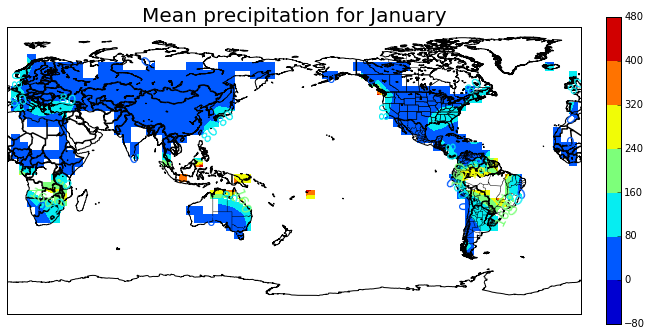

In [136]:
import netCDF4 as nc
from datetime import datetime
import xray
from mpl_toolkits.basemap import Basemap

data = xray.open_dataset('precip.mon.total.nc')
precip = data['precip']

dates = pd.DatetimeIndex(data['time'].values)
precip_jan = precip[dates.month==1]
#precip_jan['time']
precip_jul = precip[dates.month==7]
#precip_jul['time']

# calculate mean and std
mean_jan = np.mean(precip_jan, axis=0)
std_jan = np.std(precip_jan, axis=0)
mean_jul = np.mean(precip_jul, axis=0)
std_jul = np.std(precip_jul, axis=0)

# plot 
lat_1d = mean_jan['lat']
lon_1d = mean_jan['lon']
lat_1d = lat_1d[:].squeeze()
lon_1d = lon_1d[:].squeeze()
lon_2d, lat_2d = np.meshgrid(lon_1d, lat_1d)

fig=plt.figure(figsize=(11,8.5))  #width, height in inches

map = Basemap(lon_0=180, resolution='l', projection='cyl')
CS=map.contourf(lon_2d, lat_2d, mean_jan)
plt.clabel(CS,inline=1, fontsize=14, fmt='%1.0f')

map.drawcoastlines()
map.drawstates()
map.drawcountries(linewidth=1.5)

plt.title('Mean precipitation for January', fontsize=20)
plt.colorbar(fraction=0.025, pad=0.04)
plt.show()

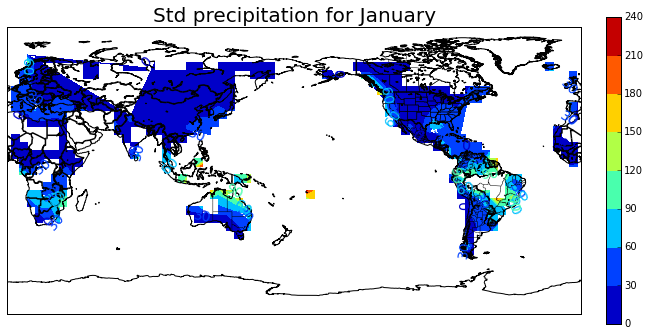

In [137]:
fig=plt.figure(figsize=(11,8.5))  #width, height in inches

map = Basemap(lon_0=180, resolution='l', projection='cyl')
CS=map.contourf(lon_2d, lat_2d, std_jan)
plt.clabel(CS,inline=1, fontsize=14, fmt='%1.0f')

map.drawcoastlines()
map.drawstates()
map.drawcountries(linewidth=1.5)

plt.title('Std precipitation for January', fontsize=20)
plt.colorbar(fraction=0.025, pad=0.04)
plt.show()

In [138]:
alpha_jan = mean_jan * mean_jan / std_jan
beta_jan = std_jan / mean_jan


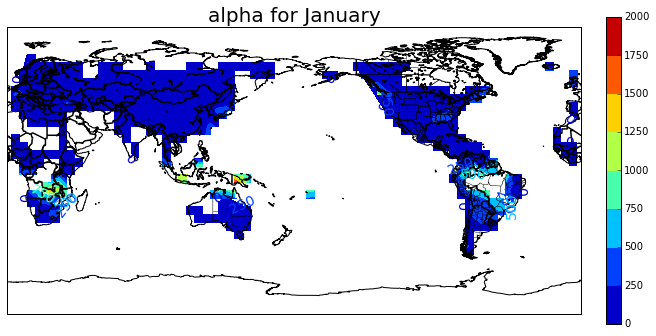

In [139]:
fig=plt.figure(figsize=(11,8.5))  #width, height in inches

map = Basemap(lon_0=180, resolution='l', projection='cyl')
CS=map.contourf(lon_2d, lat_2d, alpha_jan)
plt.clabel(CS,inline=1, fontsize=14, fmt='%1.0f')

map.drawcoastlines()
map.drawstates()
map.drawcountries(linewidth=1.5)

plt.title('alpha for January', fontsize=20)
plt.colorbar(fraction=0.025, pad=0.04)
plt.show()

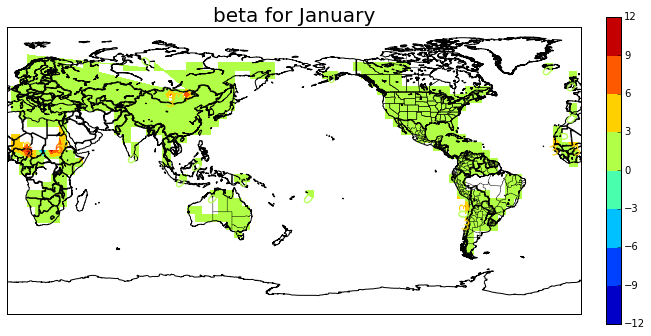

In [140]:
fig=plt.figure(figsize=(11,8.5))  #width, height in inches

map = Basemap(lon_0=180, resolution='l', projection='cyl')
CS=map.contourf(lon_2d, lat_2d, beta_jan)
plt.clabel(CS,inline=1, fontsize=14, fmt='%1.0f')

map.drawcoastlines()
map.drawstates()
map.drawcountries(linewidth=1.5)

plt.title('beta for January', fontsize=20)
plt.colorbar(fraction=0.025, pad=0.04)
plt.show()

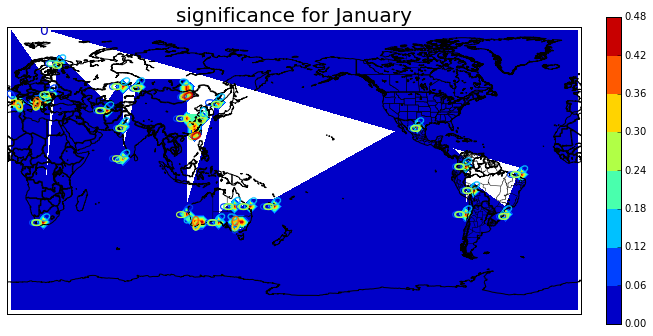

In [141]:
#precip_jan
import math
significance=np.zeros((36,72))

for i in range(36):
    for j in range (72):
        temp = precip_jan[:,i,j]
        hist, edge = np.histogram(temp, bins=10)
        chisq, p = scipy.stats.chisquare(hist);
        if (math.isnan(p)):
            significance[i,j]=1
        else:
            significance[i,j]=p

fig=plt.figure(figsize=(11,8.5))  #width, height in inches

map = Basemap(lon_0=180, resolution='l', projection='cyl')
CS=map.contourf(lon_2d, lat_2d, significance)
plt.clabel(CS,inline=1, fontsize=14, fmt='%1.0f')

map.drawcoastlines()
map.drawstates()
map.drawcountries(linewidth=1.5)

plt.title('significance for January', fontsize=20)
plt.colorbar(fraction=0.025, pad=0.04)
plt.show()